In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv('Short_leads.csv')

In [3]:
df

Unnamed: 0                                            Name  \
0               0  Member Registration Fluid Power Target Account   
1               1                                     Web Request   
2               2                          Electronic Catalog RfQ   
3               3                             Member Registration   
4               4              Sealing Solutions Configurator RFQ   
...           ...                                             ...   
86239       86239                        Requirement of Slydrings   
86240       86240                                             RFQ   
86241       86241                                             RFQ   
86242       86242                                             RFQ   
86243       86243                        武汉华液传动制造有限公司_20210728_01   

      Account_Party_Name Main_Contact_Person_Name  Company     Status_Text  \
0        Natalie Skinner              Michael Lee     True          Closed   
1           Laura Garcia             Lisa Spencer     True       Converted   
2        Ashley Mitchell              John Joseph     True          Closed   
3           Patrick Hill           Jessica Graham     True          Closed   
4         Benjamin Chang             Robert Heath     True     Unqualified   
...                  ...                      ...      ...             ...   
86239        Cindy Perez        Gregory Cervantes     True          Closed   
86240      Carolyn Berry           Michelle Estes     True          Closed   
86241     Edward Gregory           Melissa Patton     True          Closed   
86242         Jill Adams           Melissa Patton     True  Sales Rejected   
86243       Edward Hobbs           Patricia Tyler     True       Qualified   

                 Reason_Code_Text                     Source_Text  \
0      No further action required         Web Member Registration   
1                             NaN            Website Contact Form   
2                     No Response                       e-Catalog   
3                    No Potential         Web Member Registration   
4                             NaN  Sealing Solutions Configurator   
...                           ...                             ...   
86239        Automatically closed                           Sales   
86240        Automatically closed                           Sales   
86241        Automatically closed                           Sales   
86242                         NaN                           Sales   
86243                         NaN                           Sales   

      Priority_Text  Start_Date    End_Date     Owner_Party_Name  \
0            Normal  2021-05-20  9999-12-31     Lawrence Mullins   
1            Normal  2023-06-15  2023-07-15         Angela Smith   
2            Normal  2023-06-15  2023-07-15          Laura Miles   
3            Normal  2023-06-15  2023-07-15         Alicia Craig   
4            Normal  2023-06-15  2023-07-15       Jeremy Pearson   
...             ...         ...         ...                  ...   
86239        Normal   7/22/2021   8/21/2021     Stephanie Osborn   
86240        Normal   7/26/2021   8/25/2021     Stephanie Osborn   
86241        Normal   7/26/2021   8/25/2021     Stephanie Osborn   
86242        Normal   7/26/2021   8/25/2021     Stephanie Osborn   
86243        Normal   7/28/2021   8/27/2021  Courtney Pennington   

      Marketing_Unit_Name            Sales_Unit_Name  \
0                     NaN                  TSS Italy   
1                     NaN                        NaN   
2                     NaN                        NaN   
3                     NaN  TSS Automotive Hub Europe   
4                     NaN                        NaN   
...                   ...                        ...   
86239                 NaN                        NaN   
86240                 NaN                        NaN   
86241                 NaN                        NaN   
86242                 NaN          

In [4]:
import ydata_profiling
profile = df.profile_report()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
df.drop('Marketing_Unit_Name', axis=1, inplace=True)

In [40]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [41]:
df.drop('Note', axis=1, inplace=True)

In [42]:
df.drop('Main_Contact_Person_Name', axis=1, inplace=True)

In [43]:
df.drop('Account_Party_Name', axis=1, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86244 entries, 0 to 86243
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  85322 non-null  object
 1   Company               86244 non-null  bool  
 2   Status_Text           85484 non-null  object
 3   Reason_Code_Text      55320 non-null  object
 4   Source_Text           85460 non-null  object
 5   Priority_Text         85483 non-null  object
 6   Start_Date            85483 non-null  object
 7   End_Date              85483 non-null  object
 8   Owner_Party_Name      86244 non-null  object
 9   Sales_Unit_Name       33750 non-null  object
 10  Sales_Territory_Name  42397 non-null  object
dtypes: bool(1), object(10)
memory usage: 6.7+ MB


In [45]:
# 0 값을 가진 행 제거
df = df[df['Status_Text'] != 0]

# label encoding 수행
df['Status_Text'] = df['Status_Text'].apply(lambda x: 1 if x == 'Converted' else 0)

# 결과 출력
print(df['Status_Text'].value_counts())

Status_Text
0    79921
1     6323
Name: count, dtype: int64


In [46]:
y = df['Status_Text']
X = df.drop('Status_Text', axis=1)

In [47]:
y

0        0
1        1
2        0
3        0
4        0
        ..
86239    0
86240    0
86241    0
86242    0
86243    0
Name: Status_Text, Length: 86244, dtype: int64

In [48]:
X

Name  Company  \
0      Member Registration Fluid Power Target Account     True   
1                                         Web Request     True   
2                              Electronic Catalog RfQ     True   
3                                 Member Registration     True   
4                  Sealing Solutions Configurator RFQ     True   
...                                               ...      ...   
86239                        Requirement of Slydrings     True   
86240                                             RFQ     True   
86241                                             RFQ     True   
86242                                             RFQ     True   
86243                        武汉华液传动制造有限公司_20210728_01     True   

                 Reason_Code_Text                     Source_Text  \
0      No further action required         Web Member Registration   
1                             NaN            Website Contact Form   
2                     No Response                       e-Catalog   
3                    No Potential         Web Member Registration   
4                             NaN  Sealing Solutions Configurator   
...                           ...                             ...   
86239        Automatically closed                           Sales   
86240        Automatically closed                           Sales   
86241        Automatically closed                           Sales   
86242                         NaN                           Sales   
86243                         NaN                           Sales   

      Priority_Text  Start_Date    End_Date     Owner_Party_Name  \
0            Normal  2021-05-20  9999-12-31     Lawrence Mullins   
1            Normal  2023-06-15  2023-07-15         Angela Smith   
2            Normal  2023-06-15  2023-07-15          Laura Miles   
3            Normal  2023-06-15  2023-07-15         Alicia Craig   
4            Normal  2023-06-15  2023-07-15       Jeremy Pearson   
...             ...         ...         ...                  ...   
86239        Normal   7/22/2021   8/21/2021     Stephanie Osborn   
86240        Normal   7/26/2021   8/25/2021     Stephanie Osborn   
86241        Normal   7/26/2021   8/25/2021     Stephanie Osborn   
86242        Normal   7/26/2021   8/25/2021     Stephanie Osborn   
86243        Normal   7/28/2021   8/27/2021  Courtney Pennington   

                 Sales_Unit_Name                  Sales_Territory_Name  
0                      TSS Italy  ICO - Construction / Agricult. Equip  
1                            NaN                                   NaN  
2                            NaN                                   NaN  
3      TSS Automotive Hub Europe            G11 - Bosch Automotive HUB  
4                            NaN                                   NaN  
...                          ...                                   ...  
86239                        NaN                                   NaN  
86240                        NaN                                   NaN  
86241                        NaN                                   NaN  
86242                        NaN                                   NaN  
86243                        NaN                                   NaN  

[86244 rows x 10 columns]

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86244 entries, 0 to 86243
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  85322 non-null  object
 1   Company               86244 non-null  bool  
 2   Reason_Code_Text      55320 non-null  object
 3   Source_Text           85460 non-null  object
 4   Priority_Text         85483 non-null  object
 5   Start_Date            85483 non-null  object
 6   End_Date              85483 non-null  object
 7   Owner_Party_Name      86244 non-null  object
 8   Sales_Unit_Name       33750 non-null  object
 9   Sales_Territory_Name  42397 non-null  object
dtypes: bool(1), object(9)
memory usage: 6.0+ MB


In [58]:
from sklearn.preprocessing import LabelEncoder

# label encoding을 적용할 컬럼 리스트
columns_to_encode = ['Name', 'Reason_Code_Text', 'Source_Text', 'Priority_Text', 
                      'Start_Date', 'End_Date', 'Owner_Party_Name', 
                      'Sales_Unit_Name', 'Sales_Territory_Name']

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 각 컬럼에 대해 label encoding 수행
for column in columns_to_encode:
    # 해당 컬럼이 결측치를 포함하고 있다면, 결측치를 채우고 label encoding 수행
    if X[column].isnull().any():
        X[column] = X[column].fillna('missing_value')  # 결측치를 'missing_value'로 채움
    X[column] = label_encoder.fit_transform(X[column])

# 결과 확인
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86244 entries, 0 to 86243
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Name                  86244 non-null  int64
 1   Company               86244 non-null  bool 
 2   Reason_Code_Text      86244 non-null  int64
 3   Source_Text           86244 non-null  int64
 4   Priority_Text         86244 non-null  int64
 5   Start_Date            86244 non-null  int64
 6   End_Date              86244 non-null  int64
 7   Owner_Party_Name      86244 non-null  int64
 8   Sales_Unit_Name       86244 non-null  int64
 9   Sales_Territory_Name  86244 non-null  int64
dtypes: bool(1), int64(9)
memory usage: 6.0 MB


In [59]:
X

Name  Company  Reason_Code_Text  Source_Text  Priority_Text  \
0       6848     True                 6           35              3   
1      11889     True                12           37              3   
2       3124     True                 5           40              3   
3       6844     True                 4           35              3   
4       9922     True                12           24              3   
...      ...      ...               ...          ...            ...   
86239   9177     True                 0           19              3   
86240   8910     True                 0           19              3   
86241   8910     True                 0           19              3   
86242   8910     True                12           19              3   
86243  14093     True                12           19              3   

       Start_Date  End_Date  Owner_Party_Name  Sales_Unit_Name  \
0            1184      3192               670               58   
1            1914      1927                69              107   
2            1914      1927               661              107   
3            1914      1927                22               19   
4            1914      1927               490              107   
...           ...       ...               ...              ...   
86239        2789      2972               986              107   
86240        2813      2996               986              107   
86241        2813      2996               986              107   
86242        2813      2996               986              107   
86243        2823      3006               234              107   

       Sales_Territory_Name  
0                       218  
1                       400  
2                       400  
3                       163  
4                       400  
...                     ...  
86239                   400  
86240                   400  
86241                   400  
86242                   400  
86243                   400  

[86244 rows x 10 columns]

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(estimator=tree, # this is basically a random forest ...
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0, # especially if we also use this parameter ...
                        bootstrap=True,
                        bootstrap_features=False,
                        random_state=1)

forest = RandomForestClassifier(criterion='entropy', # we also need to say how we want to measure information gain
                                n_estimators=10,
                                random_state=1)

In [62]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

forest = forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

forest_train = accuracy_score(y_train, y_train_pred)
forest_test = accuracy_score(y_test, y_test_pred)
print('Random forest train/test accuracies %.3f/%.3f'
      % (forest_train, forest_test))

Decision tree train/test accuracies 0.999/0.962
Bagging train/test accuracies 0.999/0.970
Random forest train/test accuracies 0.996/0.966


In [63]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth=None,
                                criterion='gini',
                                random_state=0)

In [64]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [71]:
fi = clf_dt.feature_importances_

In [72]:
rel_col_idx = fi.argsort()[-2:][::-1]

In [73]:
X.columns[rel_col_idx]

Index(['Sales_Unit_Name', 'Reason_Code_Text'], dtype='object')

In [75]:
for i,x in enumerate(clf_dt.feature_importances_):
    print(X.columns[i], x)

Name 0.11354929253292495
Company 0.0
Reason_Code_Text 0.14291982876421366
Source_Text 0.06511616511034596
Priority_Text 0.0010497833340317479
Start_Date 0.13225652512077632
End_Date 0.1362636804686799
Owner_Party_Name 0.13691727333378145
Sales_Unit_Name 0.19208027038184713
Sales_Territory_Name 0.07984718095339889


Accuracy: 0.9657951185575976
Feature importances: [0.09733613 0.00054156 0.31504367 0.05769979 0.00063082 0.11395982
 0.12442207 0.11208124 0.08805922 0.09022567]


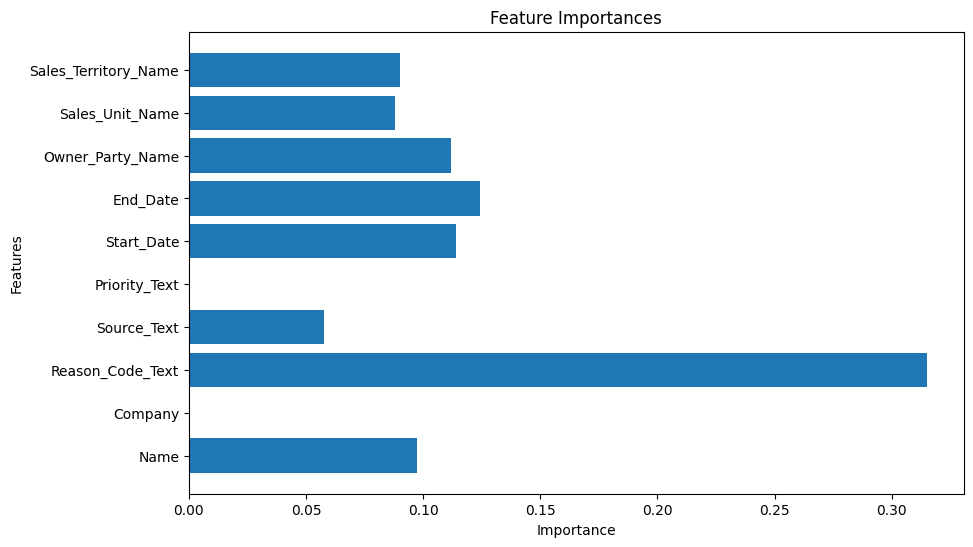

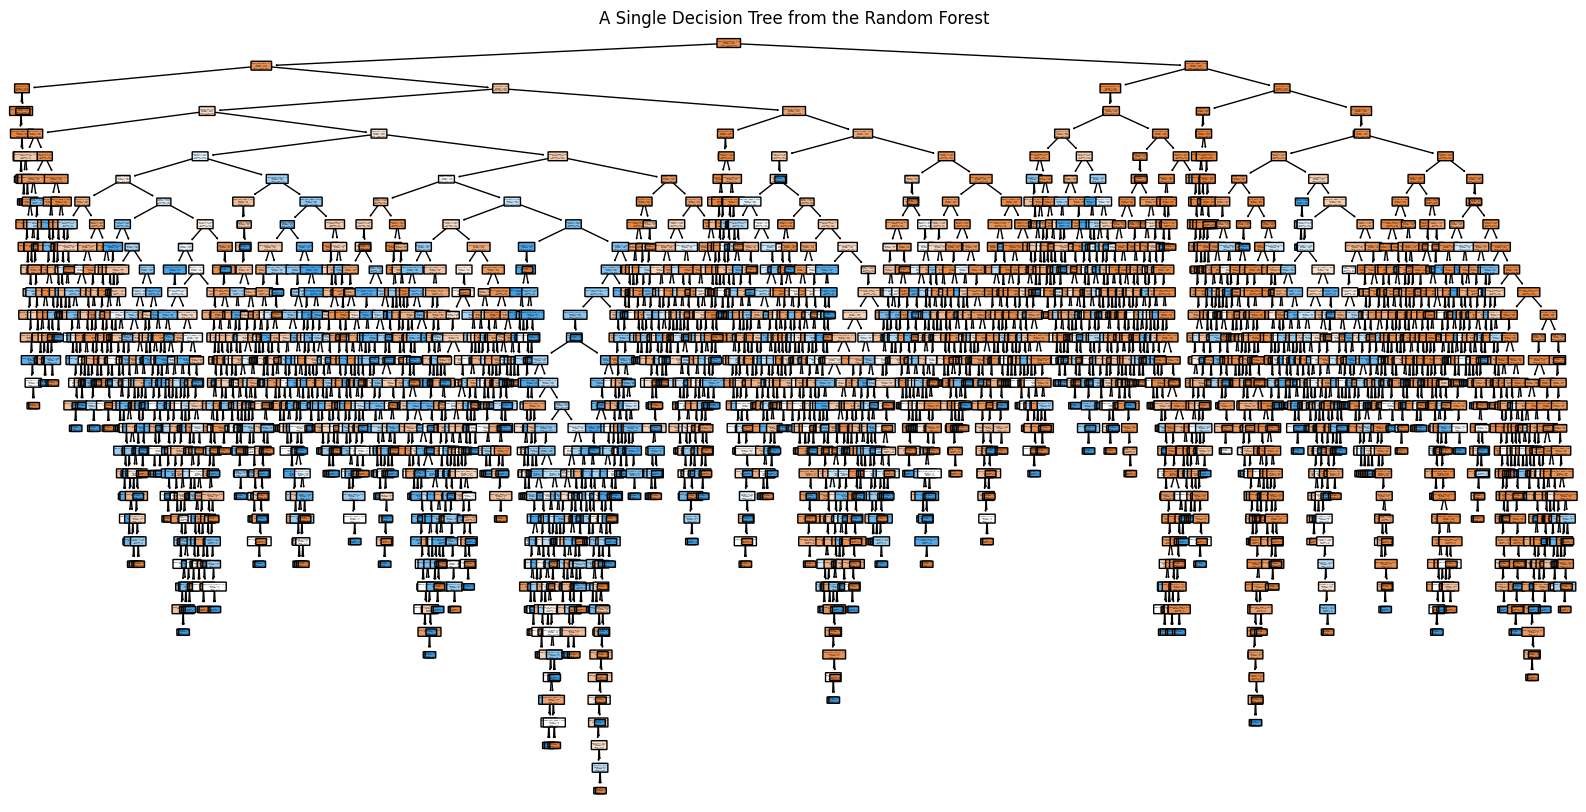

In [77]:
# Importing necessary libraries
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Make predictions on test data
y_pred = forest.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature importance
print("Feature importances:", forest.feature_importances_)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, forest.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# Plotting a single tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(forest.estimators_[0], filled=True, feature_names=X.columns, class_names=list(map(str, forest.classes_)), rounded=True)
plt.title('A Single Decision Tree from the Random Forest')
plt.show()
